<a href="https://colab.research.google.com/github/Alenushka2013/ML_for_people_tasks/blob/main/HW_2_1_Building_a_linear_regression_on_one_attribute.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдені параметри моделі близькими до ваших найкращих припущень?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, root_mean_squared_error

medical_df = pd.read_csv('https://raw.githubusercontent.com/Alenushka2013/Coursera/refs/heads/master/Datasets/medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']


# Метод найменших квадратів

In [2]:
# Метод МНК (з використанням тільки numpy, без scikit learn)  #y_hat = b + x*m
X, y = non_smoker_df.age.values, non_smoker_df.charges.values
# Додаємо стовпець одиниць
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]

In [3]:
def normal_equations(X,y):
    """Computes the closed-form solution to linear regression"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [4]:
def visual_result(X, y, prediction, label):

  plt.figure(figsize=(10, 6))
  plt.scatter(X, y, color='blue', label='Data points')
  plt.plot(X, prediction, color='red', label=label)
  plt.xlabel('Значення змінної')
  plt.ylabel('Цільове значення')
  plt.legend()
  plt.grid(True)
  plt.show()

Коефіцієнти моделі MNK: [-2091.42055657   267.24891283]
Значення помилки RMSE: 4662.506


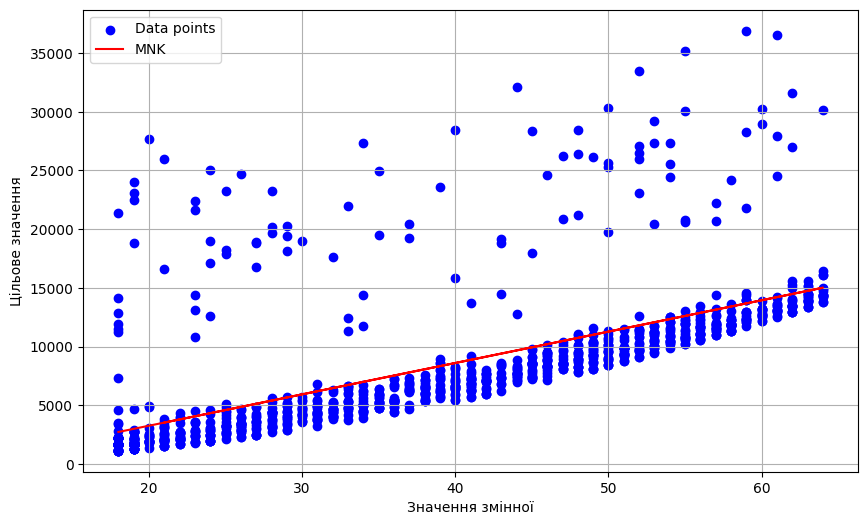

In [5]:
MNK_coefs = normal_equations(X_with_intercept,y)
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)
rmse_MNK = round(root_mean_squared_error(y, predictions_MNK), 3)
print(f'Коефіцієнти моделі MNK: {MNK_coefs}')
print(f'Значення помилки RMSE: {rmse_MNK}')

# Візуалізація результатів
visual_result(X, y, predictions_MNK, 'MNK')

# Full-Batch градієнтний спуск

In [6]:
# Градієнтний спуск
def full_batch_gradient_descent(X, y, lr=0.1, epochs=100):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

Найменшу похибку rmse = 4713.251 має модель з параметрами lr = 0.0001, epochs = 1000
Коефіцієнти моделі градієнтного спуску  b = -41.981, m = 221.105,


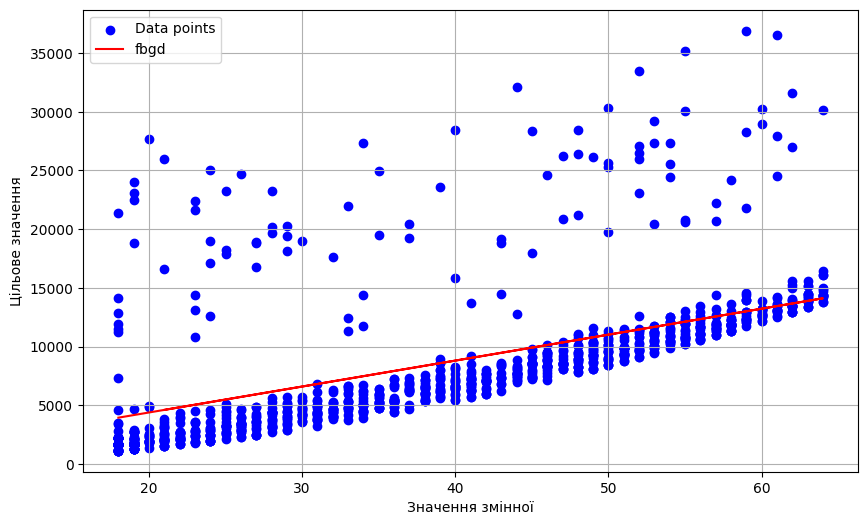

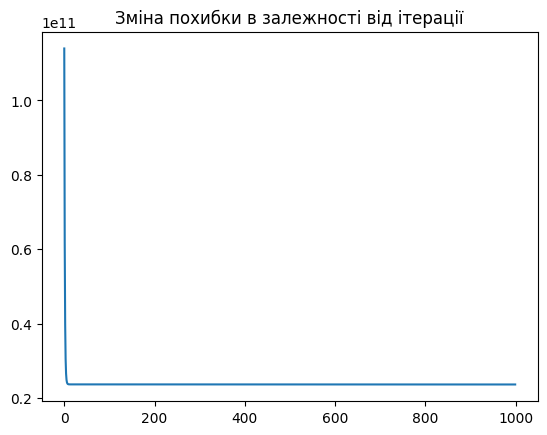

In [7]:
X_gd = np.array(X).reshape(-1, 1)
result = {} # для зберігання результатів
for lr in [0.0001, 0.00001, 0.000001]:
  for epochs in [100, 500, 1000]:
    m, b, errors = full_batch_gradient_descent(X_gd, y, lr, epochs)
    predictions_fbgd = m * X + b
    rmse = root_mean_squared_error(y, predictions_fbgd)
    result[(lr, epochs)] = (m, b, rmse, errors)


# Знаходимо значення з мінімальним rmse:
best_params = min(result.items(), key=lambda item: item[1][2])

# Розпаковуємо:
(lr_best, epochs_best), (m_fbgd, b_fbgd, rmse_fbgd, errors_fbgd) = best_params

print(f'Найменшу похибку rmse = {round(rmse_fbgd, 3)} має модель з параметрами lr = {lr_best}, epochs = {epochs_best}')
print(f'Коефіцієнти моделі градієнтного спуску  b = {b_fbgd.round(3)}, m = {m_fbgd.round(3)},')

# Візуалізація результатів
predictions_fbgd = m_fbgd * X + b_fbgd
visual_result(X, y, predictions_fbgd, 'fbgd')

plt.plot(errors_fbgd)
plt.title('Зміна похибки в залежності від ітерації')
plt.show()

# scikit-learn.LinearRegression

Коефіцієнти моделі з sklearn:  b = -2091.4205565650864, m = [267.24891283],
RMSE sklearn:4662.505766636395


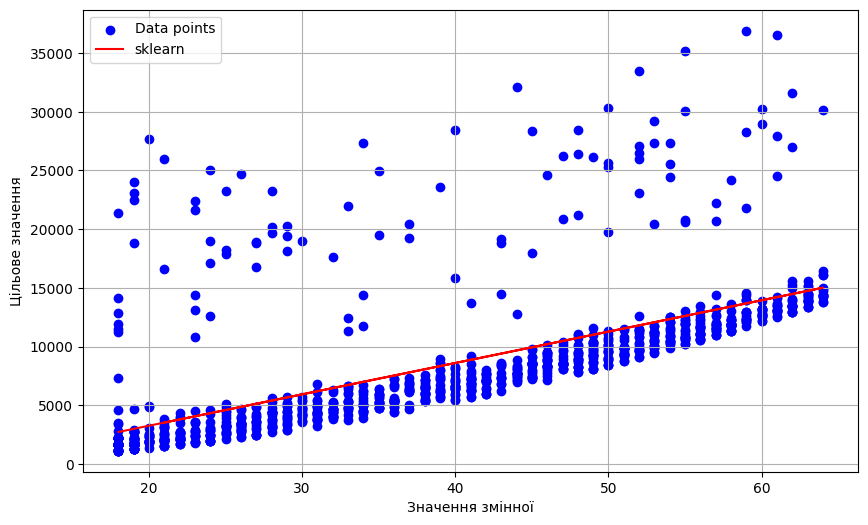

In [8]:
from sklearn.linear_model import LinearRegression

# Модель лінійної регресії засобами Scikit-learn (МНК)
lin_reg = LinearRegression()

X_lr = np.array(X).reshape(-1, 1)

lin_reg.fit(X_lr, y)

predictions_sklearn = lin_reg.predict(X_lr)

print(f'Коефіцієнти моделі з sklearn:  b = {lin_reg.intercept_}, m = {lin_reg.coef_},')

rmse_sklearn = root_mean_squared_error(y, predictions_sklearn)
print(f'RMSE sklearn:{rmse_sklearn}')

# Візуалізація результатів
visual_result(X, y, predictions_sklearn, 'sklearn')



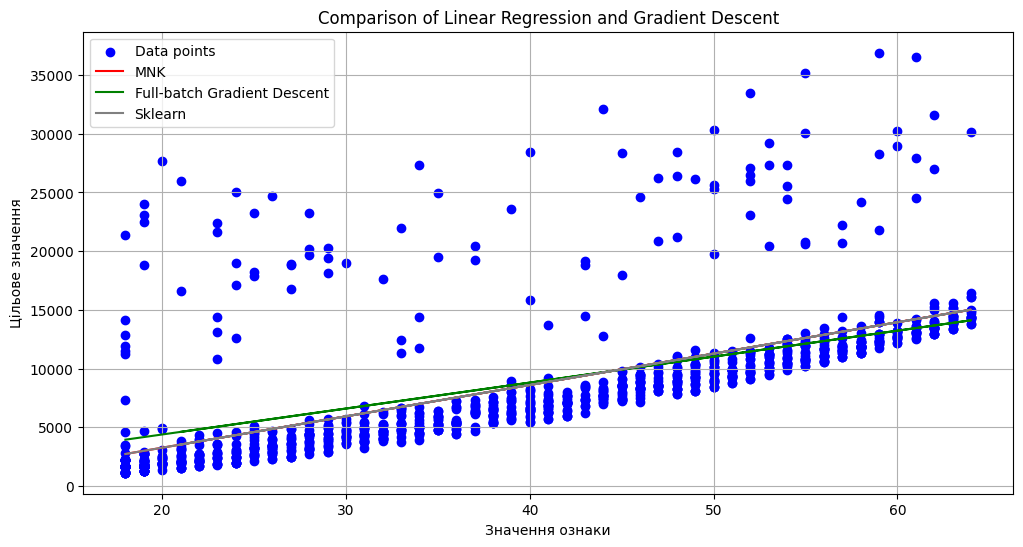

Коефіцієнти з МНК:  -2091.4205565650805 267.2489128311998
Коефіцієнти з град. спуску:  -41.98126853149978 221.1045843794301
Коефіцієнти з sklearn:  -2091.4205565650864 267.2489128311997

RMSE МНК:  4662.506
RMSE град. спуску:  4713.250582815521
RMSE sklearn:  4662.505766636395


In [9]:
# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_MNK, color='red', label='MNK')
plt.plot(X, predictions_fbgd, color='green', label='Full-batch Gradient Descent')
plt.plot(X, predictions_sklearn, color='grey', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

print('Коефіцієнти з МНК: ', *MNK_coefs)
print('Коефіцієнти з град. спуску: ', b_fbgd, m_fbgd)
print('Коефіцієнти з sklearn: ', lin_reg.intercept_, *lin_reg.coef_, end = '\n\n')

print('RMSE МНК: ', rmse_MNK)
print('RMSE град. спуску: ', rmse_fbgd)
print('RMSE sklearn: ', rmse_sklearn)

**Висновки:**

Результати моделей МНК та лінійної регресії з бібліотеки  scikit-learn є ідентичними, що передбачувано, оскільки в бібліотеці scikit-learn використовується метод найменших квадратів. Full-batch Gradient Descent метод відрізняється, та можливо потрібно було ще пошукати  та підібрати параметри для кращого результату.

Мій найкращий результат:   b = -2500, m = 275, RMSE = 4665.0 досить близький до результатів моделі методом найменших квадратів.

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

Коефіцієнти моделі:  b = -2091.4205565650864, m = [267.24891283],
RMSE = 10711.00334810241


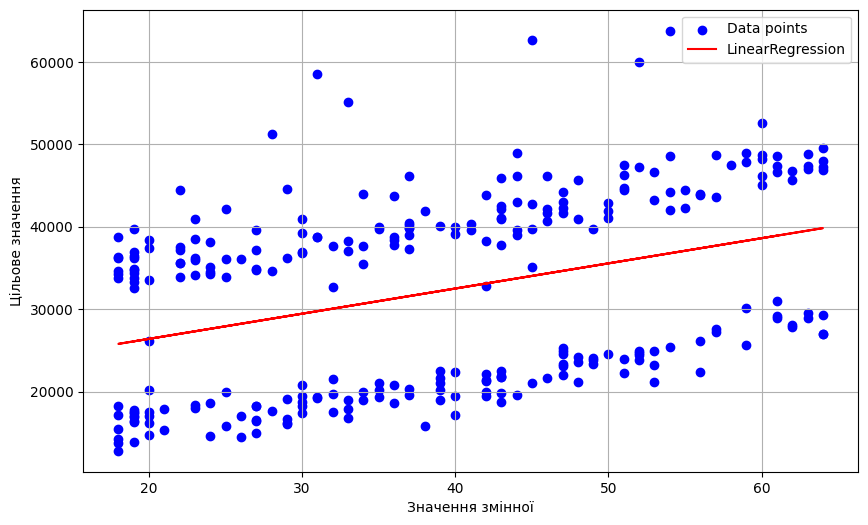

In [10]:
smoker_df = medical_df[medical_df.smoker == 'yes']
X, y = smoker_df.age.to_frame(), smoker_df.charges

model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

print(f'Коефіцієнти моделі:  b = {lin_reg.intercept_}, m = {lin_reg.coef_},')

rmse = root_mean_squared_error(y, predictions)
print(f'RMSE = {rmse}')

# Візуалізація результатів
visual_result(X, y, predictions, 'LinearRegression')

**Висновки:**

Модель звісно знайшла найкращий можливий результат, який би відповідав такому розподілу. Але використовувати таку модель на практиці не можна, оскільки точність надто низька.

У випадку для клієнтів-курців спостерігається розділення даних на дві області. Взагалі тут хочеться побудувати окремі моделі для кожної області, якраз в цьому може допомогти отримана модель.